https://requests.readthedocs.io/en/latest/

https://www.runoob.com/python3/python-requests.html

In [1]:
import numpy as np
import cv2
from PIL import Image
import requests
from urllib.request import urlopen
import matplotlib.pyplot as plt

# requests.get

In [2]:
url = r"http://zh.d2l.ai/"

In [3]:
response = requests.get(url=url, params=None)
response

<Response [200]>

In [4]:
type(response)

requests.models.Response

In [ ]:
# response = requests.get('url', params={'name':'xiaoming', 'age':15})
# response.json()

In [ ]:
# response = requests.post('url', data={'name':'xiaoming', 'age':15})
# response.json()

# 获取图片

In [3]:
image_url = r"http://zh.d2l.ai/_images/front.png"

# requests.get

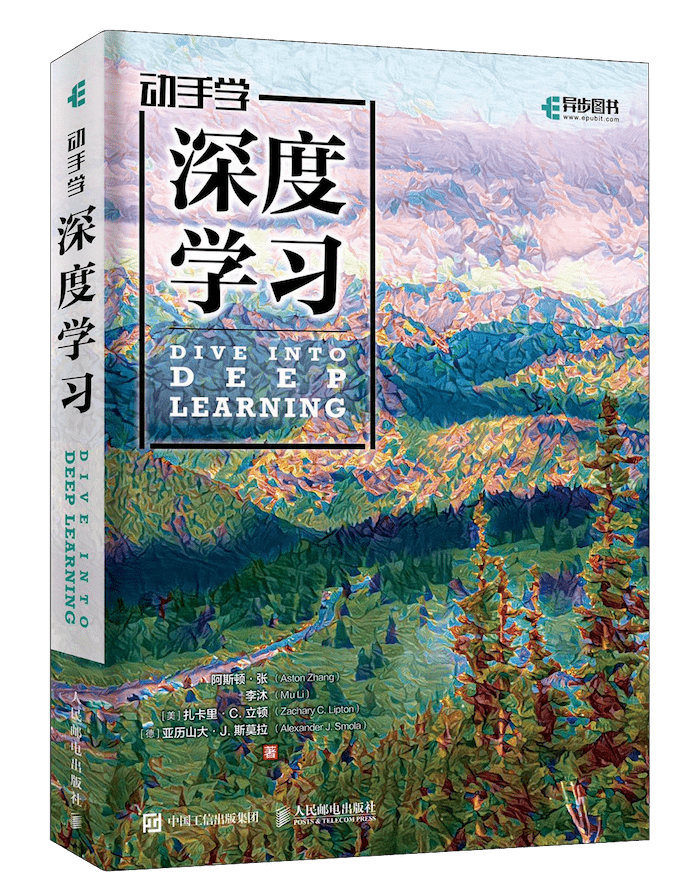

In [3]:
Image.open(requests.get(image_url, stream=True).raw)

In [4]:
requ = requests.get(image_url, stream=True)
array = np.frombuffer(requ.content, dtype="uint8")
array.shape

(320106,)

In [5]:
requ = requests.get(image_url, stream=True)
# 需要bytearray
array = np.asarray(bytearray(requ.content), dtype="uint8")
array.shape

(320106,)

## urlopen下载图片测试

In [6]:
resp = urlopen(image_url)
array = np.frombuffer(bytearray(resp.read()), dtype="uint8")
array.shape

(320106,)

In [7]:
# asarray frombuffer 效果类似
resp = urlopen(image_url)
array = np.asarray(bytearray(resp.read()), dtype="uint8")
array.shape

(320106,)

### cv2.imdecode: 返回 B G R 顺序的图片

In [8]:
# imdecode: 返回 B G R 顺序的图片
# imdecode: In the case of color images, the decoded images will have the channels stored in **B G R** order.
image_bgr = cv2.imdecode(array, cv2.IMREAD_COLOR)
image_bgr.shape

(896, 700, 3)

In [9]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

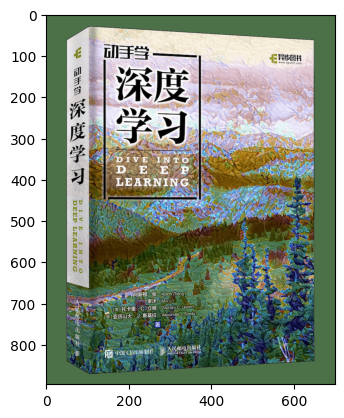

In [10]:
# 可以urlopen下来的看到是bgr格式的
plt.imshow(image_bgr)

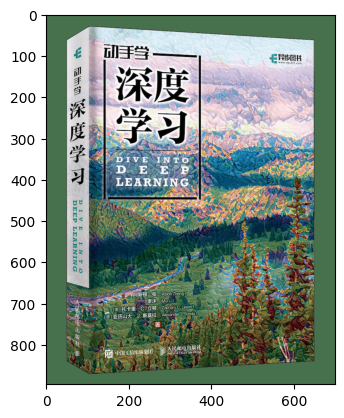

In [11]:
plt.imshow(image_rgb)

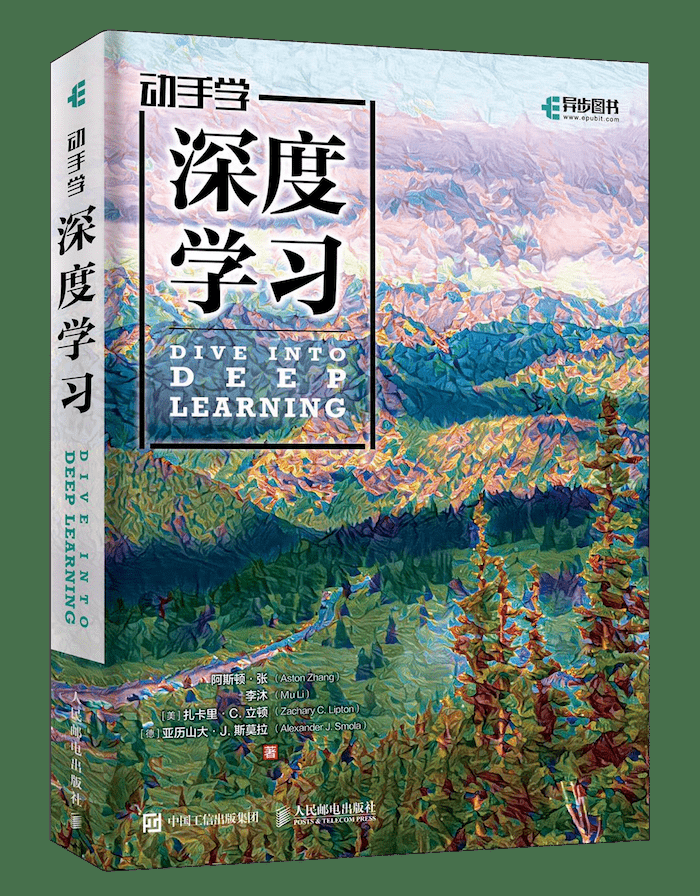

In [12]:
Image.fromarray(image_rgb)